In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
x = np.array([49,69,89,99,109])

print(x)

[ 49  69  89  99 109]


In [ ]:
y = np.array([124,95,71,45,18])
print(y)

[124  95  71  45  18]


Funcion objetivo: $MSE(\theta) = \dfrac{1}{m} \sum (Y - \theta X)^2$

Gradiente: $\nabla MSE(\theta) = \dfrac{2}{m} \sum (\theta X-Y)X$

Ecuacion de actualizacion:

$x_{k+1} = x_k - \alpha_k \nabla f(x_k)$

$x_{k} = x_{k-1} - \alpha_{k-1} \nabla f(x_{k-1})$

Queremos encontrar los valores optimos de $\theta$

$$x_{k} = \begin{bmatrix}\theta_0\\ \theta_1\end{bmatrix}$$

Reemplazando en la ecuacion de actualizacion:

$$\begin{bmatrix} \theta_{0_{k}}\\ \theta_{1_k}\end{bmatrix}= \begin{bmatrix} \theta_{0_{k-1}}\\ \theta_{1_{n-1}} \end{bmatrix}- \alpha \nabla MSE(\begin{bmatrix}\theta_{0_{k-1}}\\ \theta_{1_{k-1}}\end{bmatrix})$$


Reemplazando el gradiente:

$$\begin{bmatrix}\theta_{0_k}\\ \theta_{1_k}\end{bmatrix}= \begin{bmatrix}\theta_{0_{k-1}}\\ \theta_{1_{k-1}}\end{bmatrix}- \alpha\frac{2}{m}x^T([\theta_1\cdot x + \theta_0]-y)$$


In [ ]:
def mse(y, y_hat):
  mse_value = 1/y.size * sum((y - y_hat) ** 2)
  return mse_value

In [ ]:
nr_thetas = 5
theta0 = np.linspace(start=-10, stop=10, num=nr_thetas)
theta1 = np.linspace(start=-10, stop=10, num=nr_thetas)
theta0, theta1 = np.meshgrid(theta0,theta1)

In [ ]:
plot_mse = np.zeros((nr_thetas, nr_thetas))

In [ ]:
for i in range(nr_thetas):
  for j in range(nr_thetas):
    y_hat = theta0[i][j] + theta1[i][j] * x
    plot_mse[i][j] = mse(y, y_hat)


In [ ]:
print('mse calculado manualmente', mse(y, y_hat))
print('MSE calculado usando sklearn', MSE(y, y_hat))

mse calculado manualmente 655478.2000000001
MSE calculado usando sklearn 655478.2


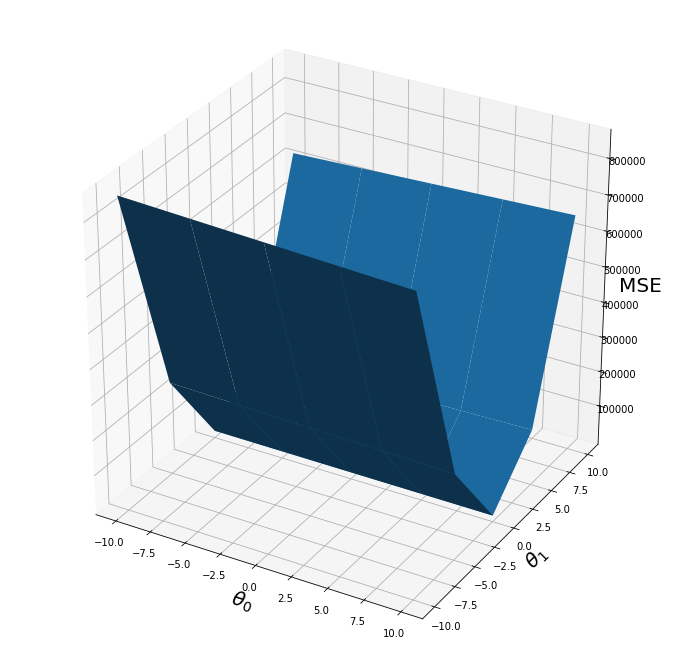

In [ ]:
fig = plt.figure(figsize=[12,12])
ax = fig.gca(projection='3d')

ax.set_xlabel(r'$\theta_0$', fontsize=20)
ax.set_ylabel(r'$\theta_1$', fontsize=20)
ax.set_zlabel('MSE', fontsize=20)

ax.plot_surface(theta0, theta1, plot_mse)
plt.show()

In [ ]:
theta = np.array([-1000,100]) #y = theta1*x + theta0 
theta #theta parameter vector [theta0,theta1] which we are trying to optimize

alpha = 0.0001 #tweakable
n_steps = 10000 #tweakable
m = 5 

grads = []
thetas = []

for step in range(n_steps):
  gradient = (2/m) * x.T.dot((x.dot(theta[0]) + theta[1])-y)
  theta = theta - alpha*gradient
  grads.append(gradient)
  thetas.append(theta)

theta

array([ -11.59583109, 1088.40416891])

$\hat{y} = 211.27 -1.7x_1$